## Student name: Elsa

## Student ID: 21272808


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

These functions are provided to assist you in Task 1a

In [3]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [4]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

In [5]:
#Also useful in Task 2!
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

# Task 1a

## Reflection

After engaging with your peers, reflect on this task and answer the following questions: 
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.

# Task 1b

In [6]:
def weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [7]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [8]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

### 1. Splitting dataset

Split the dataset provided in Et2_Regression_Data.csv into a training and a test set (decide on a suitable ratio).

In [9]:
#importing dataset from csv
dataset = np.genfromtxt('ET2_Regression_Data.csv', delimiter=',')
dataset[:5]

array([[0.95959596, 0.36680382],
       [0.49494949, 1.18282425],
       [0.6969697 , 1.14920315],
       [0.72727273, 0.94718532],
       [0.19191919, 0.41261329]])

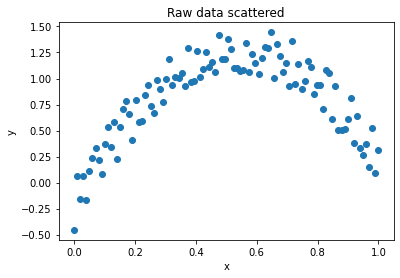

In [10]:
#preview of data
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw data scattered")
plt.show()

In [11]:
X = dataset[:,0]
y = dataset[:,1]

In [12]:
ones = np.ones(len(X))
X = np.column_stack((ones,X))
#X= np.vstack((ones,X))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Fit data using linear regression
Use the provided linear regression algorithm to obtain the best possible fit to the training data set . 

In [14]:
#get weights 
w = weights(X_train,y_train)
w

array([0.61963053, 0.40222504])

In [15]:
lr = lin_reg(w,X_train)
lr[:5]

array([0.65619644, 1.00966692, 0.79433433, 1.01779268, 1.00154117])

In [16]:
lr_line = w[1]*X_train+ w[0]

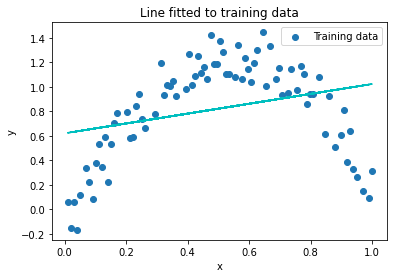

In [17]:
plt.scatter(X_train[:,1], y_train, label='Training data')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Line fitted to training data")
plt.legend()
plt.plot(X_train, lr_line, c='c', label='Approximation')
plt.show()


### 3. Feature transformations

With the knowledge that the data source is a noisy polynomial with the highest order no lower than 5 and no higher than 10, use a structured approach to try different feature transformations. 

Record the performance on training data and on test data.



In [18]:
X = dataset[:,0]
y = dataset[:,1]

In [19]:
error_in = []
error_out = []
repeats = 100
power_range = range(1, 10) # it is up to you to decide on a suitable range

for power in power_range: 
    e_in=0
    e_out=0
    
    best=1
    counter=0
    best_weight_index=0
        
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=3, random_state =99) ##Choose a suitable training_size XX
        X_train_trans = transPoly(X_train, power) ## implement your data transformation 
        X_test_trans = transPoly(X_test, power) ## implement your data transformation 
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
        
        counter=counter+1
        if e_out <best:
            best = e_out
            best_weight_index=counter
            best_weights = w
            best_train_trans = X_train_trans
            best_train = X_train
            best_test = X_test_trans
            best_ytrain=y_train
    
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

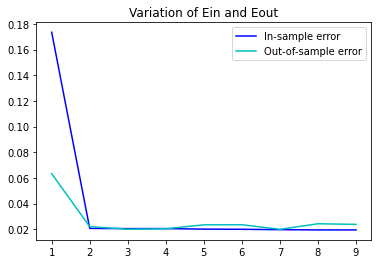

In [20]:
plt.plot(np.arange(1,10), error_in, c = 'b', label="In-sample error")
plt.plot(np.arange(1,10), error_out, c = 'c', label="Out-of-sample error")
plt.legend()
plt.title("Variation of Ein and Eout")

plt.show()

Use the results to decide on the data transformation that yields the best results.


In [21]:
X_train_final = transPoly(X_train, 2) ## implement your data transformation 
X_test_final = transPoly(X_test, 2) ## implement your data transformation 

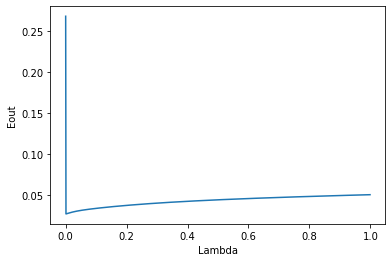

In [22]:
#kevin 
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

ein=[]
eout=[]
weights=[]
lambdas = np.arange(0, 1, 0.001)# choose a suitable range of lambdas here
X_trans = transPoly(X,50)

# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, test_size=0.3, random_state =5)
best_lambda=1
counter=0
best_weight_index=0
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    counter=counter+1
    if l <best_lambda:
        best_lambda = l
        best_weight_index=counter
        
        
    
    
plt.plot(lambdas,eout)
plt.xlabel("Lambda")
plt.ylabel("Eout")
plt.show()


In [23]:
# Find index and value of best lambda (minimum E_out value)
best_lambda_index = eout.index(min(eout))
best_lambda = lambdas[best_lambda_index]
print("Optimal value of lambda =", best_lambda)

# Compare E_out with optimal lambda vs without regularization
print("Eout with optimal lambda = ", eout[best_lambda_index])
print("Eout without regularization = ", eout[0])

Optimal value of lambda = 0.001
Eout with optimal lambda =  0.027458150488710302
Eout without regularization =  0.26813129181162326


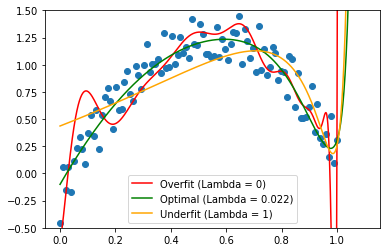

In [24]:
 # Graph dataset as scatter plot
plt.scatter(X, y)
# Add overfit model
plt.plot(np.arange(0, 1.1, 0.001), lin_reg(weights[0], transPoly(np.arange(0, 1.1, 0.001), 50)), c='red', label = "Overfit (Lambda = 0)")
# Add optimal model
plt.plot(np.arange(0, 1.1, 0.001), lin_reg(weights[best_lambda_index], transPoly(np.arange(0, 1.1, 0.001), 50)), c='green', label = "Optimal (Lambda = 0.022)")
# Add underfit model
plt.plot(np.arange(0, 1.1, 0.001), lin_reg(weights[-1], transPoly(np.arange(0, 1.1, 0.001), 50)), c='orange', label = "Underfit (Lambda = 1)")
# Limit y-axis for clarity and add legend
plt.ylim([-.5, 1.5])
plt.legend()
plt.show()

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

## Reflection

### Answer the following questions:
* **How does the plot of Ein and Eout versus highest polynomial power relate to model complexity?**
<span style="color:blue">
    
    The non-linear transformation improves in sample performance, but at the expense of requiring more data to ensure the same generalization performance.
  </span>
   
   
* **How can the choice of transformation that yielded the best results be explained in terms of sample complexity?** 
<span style="color:blue">

    The curve of datapoints that we are trying to fit is quadratic in nature, with the addition of noise, this is why x^2 is the transformation that best approximates it.
   
</span>

# Task 2

Below is an implementation of linear regression with regularization

In [25]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

* Use the provide function transPoly to obtain a weight vector of the original feature raised up to the power of 50
* Use the provided weights_reg function to perform linear regression on the data. 
* Using the provided code snippet, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!



In [26]:
data = np.loadtxt("ET2_Regression_Data.csv", delimiter=",")
X = dataset[:,0]
y = dataset[:,1]

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

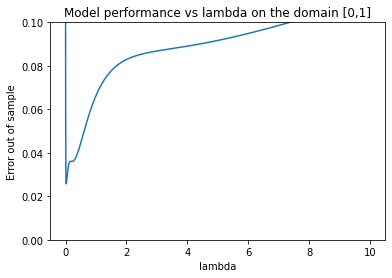

In [27]:
ein=[]
eout=[]
weights=[]
lambdas = np.arange(0,10, 0.001) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)

best_weight=0
best_l=0
min_e =1
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, test_size=0.5, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    if calc_error(w,X_test,y_test) < min_e:
        best_l=l
        best_weight=w
    
    
plt.plot(lambdas,eout)

plt.xlabel("lambda")
plt.ylabel("Error out of sample")
plt.title("Model performance vs lambda on the domain [0,1]")

plt.ylim([0, 0.1])

plt.show()


Provide the following plots:
* A plot showing model performance vs l on the domain [0,1]
* A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 

In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

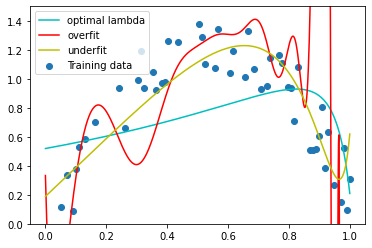

In [28]:
X_plot =np.linspace(0, 1, num=1000)
plt.scatter(X_test[:,1], y_test, label='Training data')
 
best_y=lin_reg(best_weight,transPoly(X_plot, 50)) #c

overfit_y=lin_reg(weights[0],transPoly(X_plot, 50)) #r

underfit_y =lin_reg(weights[199],transPoly(X_plot, 50)) #y


plt.plot(X_plot, best_y, color='c', label="optimal lambda")

plt.plot(X_plot, overfit_y, color='r',  label="overfit")

plt.plot(X_plot, underfit_y, color='y', label="underfit")

plt.legend()
plt.ylim([0, 1.5])


plt.show()

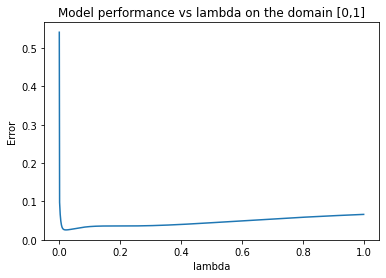

In [29]:
ein=[]
eout=[]
weights=[]
lambdas = np.arange(0.0001, 1, 0.001) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)

# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    
    
plt.plot(lambdas,eout)
plt.xlabel("lambda")
plt.ylabel("Error")
plt.title("Model performance vs lambda on the domain [0,1]")
plt.show()

## Reflection

Answer the following questions:
* **Interpret the information in the requested figures.**

<span style="color:blue">

   The plot showing model performance vs lambda on the domain [0,1], shown above, shows how the model overfits for smaller lambdas and underfits for too large values of lambda. As you decrease lambda, the optimization is less penalised. 
   For smaller values of lambda Eout increases as you decrease Ein. This could be undestrood as the regularization parameter being too small to pose a constraint strict enough on learning, leading to overfitting.


</span>

* **Explain the strategy chosen to decide on the optimum amount of regularisation.**


<span style="color:blue">
    
   For smaller values of the regularization parameter lambda, Ein decreases but Eout increases, because if lambda is too small there is not enough constraints, causing overfitting which leads to worse performance.

On the other hand, when lamda is too big we are over-constraining the learning process and not giving it enough flexibility to fit the data, which causes underfitting and leads to equally bad performance. The middle ground between them for our dataset, as seen in the graph is somewhere around 0.25.

</span>

* **Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.**


<span style="color:blue">
    
In linear regression, the model can be trained by using the pseudo-inverse algorithm, its hypothesis is w_T * x where **w = pseudoinverse of X * y**
 

Now, in regularisation we minimize the augmented error, denoted by two terms. The first is the in-sample error and the second is the penalty term, which includes lambda: **Ein + lambda * w^T * w**


Given that the pseudoinverse of X is equal to (X^T * X)^-1 * X^T we know the first term X^T * X in our function is stored by m.
 
So in our function, the pseudo inverse would correspond to `np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T)`
 
in which 
`np.identity(m.shape[0])` returns an identity matrix of the size of the number of rows of m, which is multiplied by lambda within the augmented error formula for regularization

</span>

# Task 3

Use the code-snippet from Task 2 and update to perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 

In [39]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=42, shuffle=True)
ein=[]
eout=[]
weights=[]
lambdas = np.arange(0, 1, 0.001)
X_trans = transPoly(X,100)
# random_state fixed to get reproducible (and 'good'! :-)) results

for l in lambdas:
    e_in=[]
    e_out=[]
    for train_index, test_index in kf.split(X_trans):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]
        w = weights_reg(X_train,y_train,l)
        e_in.append(calc_error(w,X_train,y_train))
        e_out.append(calc_error(w,X_test,y_test))
    ein.append(np.mean(e_in))
    eout.append(np.mean(e_out))
    weights.append(w)
    

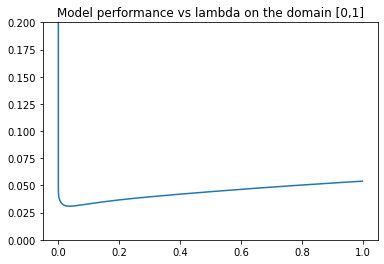

In [60]:
plt.plot(lambdas,eout)
plt.ylim([0,0.2])
plt.title("Model performance vs lambda on the domain [0,1]")
plt.show()


In [41]:
min_error = min(eout)
optimal_lambda_3 = lambdas[eout.index(min_error)]

In [42]:
print("\tRESULTS:\n\nEout (no regularisation) =", eout[0])
print("Eout (optimal regularisation) =", min_error)
print("\nOptimal regularisation parameterlambda =", lambdas[eout.index(min_error)])

	RESULTS:

Eout (no regularisation) = 1323.6769895684217
Eout (optimal regularisation) = 0.030925579167743984

Optimal regularisation parameterlambda = 0.037


In [47]:
x_range = np.arange(0, 1, 0.001)
over_l=weights[0]
optimal_l=weights[eout.index(min_error)]
under_l=weights[-1]
overfit_linreg = lin_reg(over_l, transPoly(x_range, 100))
optimal_linreg = lin_reg(optimal_l, transPoly(x_range, 100))
underfit_linreg = lin_reg(under_l, transPoly(x_range, 100))

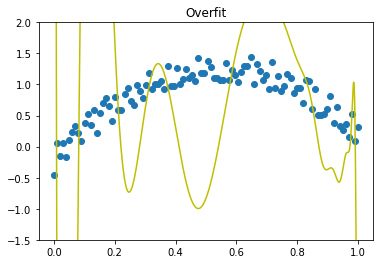

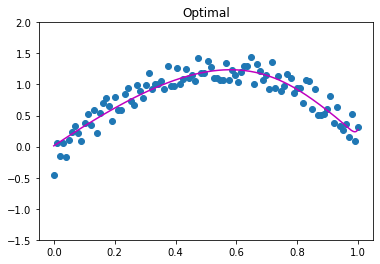

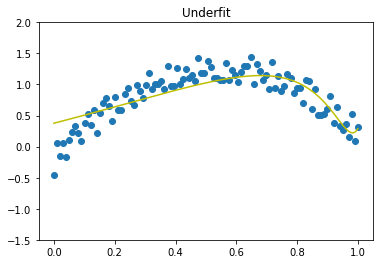

In [59]:
plt.scatter(X,y)
plt.plot(x_range, overfit_linreg, c='y')
plt.ylim(-1.5,2.0)

plt.title("Overfitting")
plt.show()

plt.scatter(X,y)
plt.plot(x_range, optimal_linreg, c='m')
plt.ylim(-1.5,2.0)

plt.title("Optimal lamba")
plt.show()


plt.scatter(X,y)
plt.plot(x_range, underfit_linreg, c='y')
plt.ylim(-1.5,2.0)

plt.title("Underfitting ")
plt.show()


## Reflection

Cross validation is a very interesting technique in ML: Data is split into 10 parts and one is picked as testing sample once at a time, until they've all been trained and used for testing in various combinations. 
Validation attempts minimizing our Eout, by trying to estimate it directly through our validating fold.

In our case we are repeating this 1000 times per "fold" with each lambda value. 

The use of validation affects the learning process by outputing a lambda value that is now more robust as it has been looped over many different combinations of the data. 



# Task 4

In [63]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

ridge = RidgeCV(cv=10, alphas=lambdas[1:]).fit(X_trans, y)
lasso = LassoCV(cv=10, alphas=lambdas[1:]).fit(X_trans, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e-03, tolerance: 1.545e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.780e-03, tolerance: 1.545e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [64]:
ridge_error = calc_error(ridge.coef_,X_trans,y)
ridge_alpha = ridge.alpha_
lasso_error = calc_error(lasso.coef_, X_trans, y)
lasso_alpha = lasso.alpha_

In [65]:
print("ridge error is", calc_error(ridge.coef_, X_trans, y))
print("lambda is", ridge.alpha_)
print()
print("LassoCV error is", calc_error(lasso.coef_, X_trans, y))
print("lambda is", lasso.alpha_)

ridge error is 0.024037311103114314
lambda is 0.049

LassoCV error is 0.023221837839207803
lambda is 0.001


## Reflection

 Regularization helps to prevent overfitting by con­straining the model. This helps smooth out the impact of the noise, while still giving us flexibility to fit the data.
Ridge regression adds a penalty equivalent to square of the magnitude of the coefficients: It contraints the coefficients. Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
The difference with lasso is in the square of the coefficients. This type of regularization which is called L1 can lead to zero coefficients when they're not contributing, and thus resulting in features being left out. 

Lasso regression helps with overfitting and feature selection.